In [1]:
#%matplotlib inline
import pandas as pd

pd.options.display.max_columns = None
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
import json

In [2]:
df = pd.read_pickle('../data/processed/linear_regression.pkl')
DIMENSION_E0 = len(df.at[0, 'one_hot_encode_forward'])
DIMENSION_E = len(df.at[0, 'energy_encode_start'])


df = df[df['migration_barriers'] < 1.1]
print(f'Dimensionality {DIMENSION_E0} {DIMENSION_E}')

Dimensionality 2610 24


In [3]:
df

,index,migration_atom,migration_barriers,energy_difference,e0,energy_start,energy_end,one_hot_encode_forward,cluster_extension_forward,one_hot_encode_backward,cluster_extension_backward,energy_encode_start,energy_encode_end
0,0,Mg,0.481830,0.135878,0.413891,-920.683419,-920.547541,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.5, 0.5, 0.0, ...","[1.0, 0.0, 2.0, 1.0, 2.0, 0.0, 0.0, 1.0, 2.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[1362.0, 145.0, 0.0, 17.0, 0.0, 0.0, 696.0, 45..."
1,0,Mg,0.345952,-0.135878,0.413891,-920.547541,-920.683419,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.5, 0.5, 0.0, ...","[1.0, 0.0, 2.0, 1.0, 2.0, 0.0, 0.0, 1.0, 2.0, ...","[1362.0, 145.0, 0.0, 17.0, 0.0, 0.0, 696.0, 45...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45..."
2,1,Al,0.728938,0.107344,0.675266,-920.683419,-920.576074,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, ...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[1363.0, 147.0, 0.0, 14.0, 0.0, 0.0, 693.0, 48..."
3,1,Al,0.621594,-0.107344,0.675266,-920.576074,-920.683419,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...","[1363.0, 147.0, 0.0, 14.0, 0.0, 0.0, 693.0, 48...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45..."
4,2,Al,0.782146,0.154622,0.704835,-920.683419,-920.528797,"[0.5, 0.5, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[1361.0, 149.0, 0.0, 14.0, 0.0, 0.0, 693.0, 48..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2255,1127,Zn,0.242831,-0.064467,0.275064,-918.902771,-918.967238,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, -0.25, 0.0, -0.5, 0....","[0.5, 0.0, 0.5, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1.0, -0.5, 0.0, 0.0, 0.0, -0.5, 0.0, 0.0, -0....","[1375.0, 0.0, 134.0, 0.0, 0.0, 15.0, 688.0, 0....","[1375.0, 0.0, 136.0, 0.0, 0.0, 13.0, 688.0, 0...."
2256,1128,Zn,0.266368,0.008176,0.262280,-918.967238,-918.959061,"[0.5, 0.0, 0.5, 1.0, 0.0, 0.0, 0.5, 0.0, 0.5, ...","[1.0, -0.5, 0.0, -0.5, 0.0, -0.5, 0.0, 0.0, 0....","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, -0.5, 0.0, 0.0, 0.0,...","[1375.0, 0.0, 136.0, 0.0, 0.0, 13.0, 688.0, 0....","[1375.0, 0.0, 136.0, 0.0, 0.0, 13.0, 688.0, 0...."
2257,1128,Zn,0.258192,-0.008176,0.262280,-918.959061,-918.967238,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, -0.5, 0.0, 0.0, 0.0,...","[0.5, 0.0, 0.5, 1.0, 0.0, 0.0, 0.5, 0.0, 0.5, ...","[1.0, -0.5, 0.0, -0.5, 0.0, -0.5, 0.0, 0.0, 0....","[1375.0, 0.0, 136.0, 0.0, 0.0, 13.0, 688.0, 0....","[1375.0, 0.0, 136.0, 0.0, 0.0, 13.0, 688.0, 0...."
2258,1129,Al,0.543555,0.108872,0.489119,-918.967238,-918.858366,"[0.75, 0.0, 0.25, 0.0, 0.0, 1.0, 0.5, 0.0, 0.5...","[1.0, -0.25, -1.0, -0.5, 0.0, -0.5, -0.75, 0.0...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, -0.5, 0.0, 0.0, 0.0,...","[1375.0, 0.0, 136.0, 0.0, 0.0, 13.0, 688.0, 0....","[1373.0, 0.0, 138.0, 0.0, 0.0, 13.0, 689.0, 0...."


In [4]:
df = df.sample(frac=1)
# df_copy = df.drop_duplicates(subset=['migration_atom', 'energy_start'])
df_copy = df

In [5]:
# TEST_SIZE = 100

# x_train, y_train = np.stack(df_copy[:-TEST_SIZE]['energy_encode_start']), np.array(df_copy[:-TEST_SIZE]['energy_start'])

# df_train, df_test = df[:-TEST_SIZE], df[-TEST_SIZE:]

# x_train_Al, y_train_Al = np.stack(df_train['one_hot_encode_forward']), \
#                          np.array(df_train['e0'])
# x_train_Mg, y_train_Mg = np.stack(df_train['one_hot_encode_forward']), \
#                          np.array(df_train['e0'])
# x_train_Zn, y_train_Zn = np.stack(df_train['one_hot_encode_forward']), \
#                          np.array(df_train['e0'])


# x_test, y_test = np.stack(df_copy[-TEST_SIZE:]['energy_encode_start']), np.array(df_copy[:-TEST_SIZE:]['energy_start'])

# x_test_Al, y_test_Al = np.stack(df_test['one_hot_encode_forward']), \
#                        np.array(df_test['e0'])
# x_test_Mg, y_test_Mg = np.stack(df_test['one_hot_encode_forward']), \
#                        np.array(df_test['e0'])
# x_test_Zn, y_test_Zn = np.stack(df_test['one_hot_encode_forward']), \
#                        np.array(df_test['e0'])

In [6]:
TEST_SIZE = 500

x_train, y_train = np.stack(df_copy[:-TEST_SIZE]['energy_encode_start']), np.array(df_copy[:-TEST_SIZE]['energy_start'])

df_train, df_test = df[:-TEST_SIZE], df[-TEST_SIZE:]

x_train_Al, y_train_Al = np.stack(df_train[df_train['migration_atom'] == 'Al']['one_hot_encode_forward']), \
                         np.array(df_train[df_train['migration_atom'] == 'Al']['e0'])
x_train_Mg, y_train_Mg = np.stack(df_train[df_train['migration_atom'] == 'Mg']['one_hot_encode_forward']), \
                         np.array(df_train[df_train['migration_atom'] == 'Mg']['e0'])
x_train_Zn, y_train_Zn = np.stack(df_train[df_train['migration_atom'] == 'Zn']['one_hot_encode_forward']), \
                         np.array(df_train[df_train['migration_atom'] == 'Zn']['e0'])


x_test, y_test = np.stack(df_copy[-TEST_SIZE:]['energy_encode_start']), np.array(df_copy[:-TEST_SIZE:]['energy_start'])

x_test_Al, y_test_Al = np.stack(df_test[df_test['migration_atom'] == 'Al']['one_hot_encode_forward']), \
                       np.array(df_test[df_test['migration_atom'] == 'Al']['e0'])
x_test_Mg, y_test_Mg = np.stack(df_test[df_test['migration_atom'] == 'Mg']['one_hot_encode_forward']), \
                       np.array(df_test[df_test['migration_atom'] == 'Mg']['e0'])
x_test_Zn, y_test_Zn = np.stack(df_test[df_test['migration_atom'] == 'Zn']['one_hot_encode_forward']), \
                       np.array(df_test[df_test['migration_atom'] == 'Zn']['e0'])

In [7]:
print(x_train.shape)
print(x_train_Al.shape)
print(x_train_Mg.shape)
print(x_train_Zn.shape)

(1746, 24)
(867, 2610)
(438, 2610)
(441, 2610)


In [8]:
mu_x, mean_y = np.mean(x_train, axis=0), np.mean(y_train)
mu_x_Al, mean_y_Al = np.mean(x_train_Al, axis=0), np.mean(y_train_Al)
mu_x_Mg, mean_y_Mg = np.mean(x_train_Mg, axis=0), np.mean(y_train_Mg)
mu_x_Zn, mean_y_Zn = np.mean(x_train_Zn, axis=0), np.mean(y_train_Zn)

covariance = np.cov(x_train, rowvar=False)
covariance_Al = np.cov(x_train_Al, rowvar=False)
covariance_Mg = np.cov(x_train_Mg, rowvar=False)
covariance_Zn = np.cov(x_train_Zn, rowvar=False)

U, S, Uh = np.linalg.svd(covariance)
U_Al, S_Al, Uh_Al = np.linalg.svd(covariance_Al)
U_Mg, S_Mg, Uh_Mg = np.linalg.svd(covariance_Mg)
U_Zn, S_Zn, Uh_Zn = np.linalg.svd(covariance_Zn)

PCS Dimensionality Reduction
13 principal components are needed to represent 99.99% of the total variation
The percentage reduction in dimension is: 45.83333333333333%
PCS Dimensionality Reduction
655 principal components are needed to represent 99.99% of the total variation
The percentage reduction in dimension is: 74.90421455938697%
PCS Dimensionality Reduction
404 principal components are needed to represent 99.99% of the total variation
The percentage reduction in dimension is: 84.52107279693487%
PCS Dimensionality Reduction
415 principal components are needed to represent 99.99% of the total variation
The percentage reduction in dimension is: 84.09961685823755%


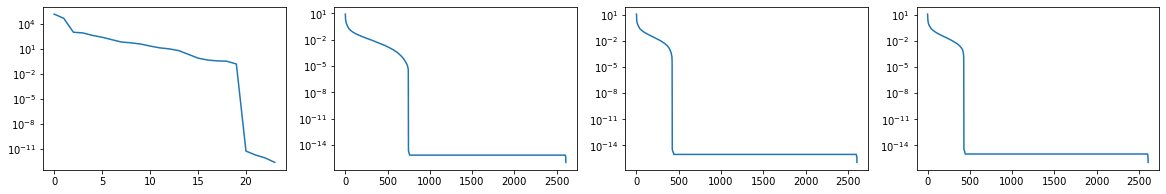

In [9]:
fig, axes = plt.subplots(1, 4, figsize=(20, 3))
axes[0].semilogy(np.arange(x_train.shape[1]), S)
axes[1].semilogy(np.arange(x_train_Al.shape[1]), S_Al)
axes[2].semilogy(np.arange(x_train_Mg.shape[1]), S_Mg)
axes[3].semilogy(np.arange(x_train_Zn.shape[1]), S_Zn)
##################################################################################################################
for S_it in (S, S_Al, S_Mg, S_Zn):
    sum_of_S = np.sum(S_it)
    PERCENT = 99.99
    for i in range(S_it.shape[0]):
        if np.sum(S_it[:i]) > PERCENT/100*sum_of_S:
            break
    print('PCS Dimensionality Reduction')
    print(i, f'principal components are needed to represent {PERCENT}% of the total variation')
    print(f'The percentage reduction in dimension is: {(S_it.shape[0]-i)/S_it.shape[0]*100}%')


In [10]:
NUM_FEATURES_1 = 24
NUM_FEATURES_2 = 130

In [11]:
x_train, y_train = (x_train - mu_x).dot(U[:,:NUM_FEATURES_1]), y_train - mean_y
x_test, y_test = (x_test - mu_x).dot(U[:,:NUM_FEATURES_1]), y_test - mean_y

x_train_Al, y_train_Al = (x_train_Al - mu_x_Al).dot(U_Al[:,:NUM_FEATURES_2]), y_train_Al - mean_y_Al
x_test_Al, y_test_Al = (x_test_Al - mu_x_Al).dot(U_Al[:,:NUM_FEATURES_2]), y_test_Al - mean_y_Al

x_train_Mg, y_train_Mg = (x_train_Mg - mu_x_Mg).dot(U_Mg[:,:NUM_FEATURES_2]), y_train_Mg - mean_y_Mg
x_test_Mg, y_test_Mg = (x_test_Mg - mu_x_Mg).dot(U_Mg[:,:NUM_FEATURES_2]), y_test_Mg - mean_y_Mg

x_train_Zn, y_train_Zn = (x_train_Zn - mu_x_Zn).dot(U_Zn[:,:NUM_FEATURES_2]), y_train_Zn - mean_y_Zn
x_test_Zn, y_test_Zn = (x_test_Zn - mu_x_Zn).dot(U_Zn[:,:NUM_FEATURES_2]), y_test_Zn - mean_y_Zn

In [12]:
lamd = 0.1
lamd_Al = 0.1
lamd_Mg = 0.1
lamd_Zn = 0.1

theta = np.dot(np.linalg.inv(np.dot(x_train.T, x_train) + lamd * np.identity(NUM_FEATURES_1)),
               x_train.T).dot(y_train)

theta_Al = np.dot(np.linalg.inv(np.dot(x_train_Al.T, x_train_Al) + lamd_Al * np.identity(NUM_FEATURES_2)),
                  x_train_Al.T).dot(y_train_Al)

theta_Mg = np.dot(np.linalg.inv(np.dot(x_train_Mg.T, x_train_Mg) + lamd_Mg * np.identity(NUM_FEATURES_2)),
                  x_train_Mg.T).dot(y_train_Mg)

theta_Zn = np.dot(np.linalg.inv(np.dot(x_train_Zn.T, x_train_Zn) + lamd_Zn * np.identity(NUM_FEATURES_2)),
                  x_train_Zn.T).dot(y_train_Zn)

In [13]:
def pred_energy_ls(row):
    return np.inner(theta, (np.asarray(row['energy_encode_start']) - mu_x).dot(U[:, :NUM_FEATURES_1])) + mean_y
        
def pred_e0_ls(row):
    if row['migration_atom'] == 'Al':
        return np.inner(theta_Al,
                        (np.asarray(row['one_hot_encode_forward']) - mu_x_Al).dot(U_Al[:, :NUM_FEATURES_2])) + mean_y_Al
    elif row['migration_atom'] == 'Mg':
        return np.inner(theta_Mg,
                        (np.asarray(row['one_hot_encode_forward']) - mu_x_Mg).dot(U_Mg[:, :NUM_FEATURES_2])) + mean_y_Mg
    elif row['migration_atom'] == 'Zn':
        return np.inner(theta_Zn,
                        (np.asarray(row['one_hot_encode_forward']) - mu_x_Zn).dot(U_Zn[:, :NUM_FEATURES_2])) + mean_y_Zn
    else:
        raise RuntimeError('Unknown element')
        
def pred_de_ls(row):
    return np.inner(theta, (np.asarray(row['energy_encode_end']) - mu_x).dot(U[:, :NUM_FEATURES_1])) - np.inner(theta, (np.asarray(row['energy_encode_start']) - mu_x).dot(U[:, :NUM_FEATURES_1]))

        
def pred_barrier_ls(row):
    return row['predicted_e0'] + 0.5*(np.inner(theta, (np.asarray(row['energy_encode_end']) - mu_x).dot(U[:, :NUM_FEATURES_1])) - np.inner(theta, (np.asarray(row['energy_encode_start']) - mu_x).dot(U[:, :NUM_FEATURES_1])))

df['predicted_energy'] = df.apply(lambda row: pred_energy_ls(row), axis=1)
df_train['predicted_energy'] = df_train.apply(lambda row: pred_energy_ls(row), axis=1)
df_test['predicted_energy'] = df_test.apply(lambda row: pred_energy_ls(row), axis=1)


df['predicted_e0'] = df.apply(lambda row: pred_e0_ls(row), axis=1)
df_train['predicted_e0'] = df_train.apply(lambda row: pred_e0_ls(row), axis=1)
df_test['predicted_e0'] = df_test.apply(lambda row: pred_e0_ls(row), axis=1)

df['predicted_de'] = df.apply(lambda row: pred_de_ls(row), axis=1)
df_train['predicted_de'] = df_train.apply(lambda row: pred_de_ls(row), axis=1)
df_test['predicted_de'] = df_test.apply(lambda row: pred_de_ls(row), axis=1)


df['predicted_barrier'] = df['e0'] + 0.5*df['predicted_de']
df_train['predicted_barrier'] = df_train['e0'] + 0.5*df_train['predicted_de']
df_test['predicted_barrier'] = df_test['e0'] + 0.5*df_test['predicted_de']

In [14]:
df

,index,migration_atom,migration_barriers,energy_difference,e0,energy_start,energy_end,one_hot_encode_forward,cluster_extension_forward,one_hot_encode_backward,cluster_extension_backward,energy_encode_start,energy_encode_end,predicted_energy,predicted_e0,predicted_de,predicted_barrier
730,365,Zn,0.354584,0.042238,0.333465,-844.218048,-844.175809,"[0.5, 0.0, 0.5, 1.0, 0.0, 0.0, 0.5, 0.5, 0.0, ...","[1.0, -0.5, 0.0, 1.0, 1.0, 0.25, 0.25, 1.0, -0...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, -0.5, 0.0, 0.5, -0.5, -0....","[1123.0, 77.0, 178.0, 26.0, 86.0, 34.0, 558.0,...","[1123.0, 77.0, 176.0, 26.0, 87.0, 35.0, 558.0,...",-844.325896,0.358517,0.205552,0.436241
843,421,Mg,0.442385,-0.029557,0.457163,-919.122024,-919.151581,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.5, 0.0, 0.5, ...","[1.0, 0.0, -1.0, -0.5, 1.0, 0.0, 0.0, 1.0, 0.5...","[1362.0, 88.0, 58.0, 4.0, 10.0, 2.0, 696.0, 27...","[1362.0, 90.0, 58.0, 4.0, 8.0, 2.0, 696.0, 27....",-919.295731,0.470791,-0.086674,0.413826
1394,697,Zn,0.547515,0.237807,0.428611,-873.001806,-872.763999,"[0.5, 0.5, 0.0, 0.0, 1.0, 0.0, 0.5, 0.5, 0.0, ...","[1.0, 1.0, 2.0, 1.0, 2.0, 0.0, 0.5, 0.5, 0.5, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 1.0, 2.0, ...","[1222.0, 148.0, 47.0, 47.0, 52.0, 8.0, 599.0, ...","[1222.0, 148.0, 47.0, 47.0, 51.0, 9.0, 599.0, ...",-872.881528,0.449579,0.141264,0.499244
247,123,Zn,0.319100,0.065129,0.286535,-875.202047,-875.136917,"[0.75, 0.0, 0.25, 1.0, 0.0, 0.0, 0.5, 0.0, 0.5...","[1.0, -0.25, 0.0, -0.5, 0.0, -0.75, 0.0, -0.5,...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, -0.5, -0.25, 0.0, -0.5, 0...","[1202.0, 0.0, 278.0, 0.0, 0.0, 44.0, 607.0, 0....","[1202.0, 0.0, 275.0, 0.0, 0.0, 47.0, 607.0, 0....",-875.093843,0.279908,-0.051558,0.260756
149,74,Al,0.600387,0.042468,0.579153,-916.214104,-916.171636,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.5,...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, -0.5, -0.25, 0.0, -0.5, 0...","[1362.0, 0.0, 145.0, 0.0, 0.0, 17.0, 689.0, 0....","[1362.0, 0.0, 145.0, 0.0, 0.0, 17.0, 692.0, 0....",-916.108244,0.608509,-0.135765,0.511271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844,922,Al,0.542410,0.091922,0.496449,-932.070763,-931.978841,"[0.75, 0.25, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0...","[1.0, 0.5, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1415.0, 100.0, 0.0, 9.0, 0.0, 0.0, 707.0, 51....","[1413.0, 102.0, 0.0, 9.0, 0.0, 0.0, 706.0, 52....",-932.036057,0.500847,-0.003159,0.494869
1331,665,Mg,0.291721,-0.160560,0.372001,-907.497544,-907.658104,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...","[0.75, 0.25, 0.0, 1.0, 0.0, 0.0, 0.5, 0.5, 0.0...","[1.0, 0.5, 0.0, 1.0, 1.0, 0.5, 0.25, -0.5, 2.0...","[1319.0, 130.0, 45.0, 19.0, 8.0, 3.0, 660.0, 6...","[1319.0, 131.0, 45.0, 18.0, 8.0, 3.0, 660.0, 6...",-907.531654,0.357622,-0.147324,0.298339
972,486,Al,0.799586,0.070853,0.764159,-917.762575,-917.691721,"[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1.0, 2.0, 0.0, 0.0, 0.0, 2.0, 1.25, 0.0, 0.0,...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1358.0, 128.0, 20.0, 15.0, 3.0, 0.0, 690.0, 4...","[1354.0, 132.0, 20.0, 15.0, 3.0, 0.0, 690.0, 4...",-917.762488,0.794794,0.185041,0.856680
1848,924,Al,0.728444,0.046476,0.705206,-932.070763,-932.024287,"[0.75, 0.25, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0...","[1.0, 0.5, 0.0, 2.0, 0.0, 0.5, 0.5, 1.0, 0.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, ...","[1415.0, 100.0, 0.0, 9.0, 0.0, 0.0, 707.0, 51....","[1415.

rmse train 0.14294208573314707
rmse train 0.13417894976078426


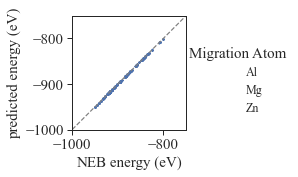

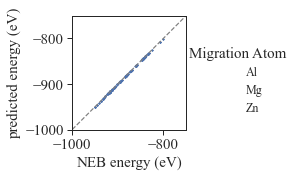

In [15]:
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [-1000, -750]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_train, legend_out=True,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'energy_start', 'predicted_energy', alpha=1, s=1, marker='8')
g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
                 scatterpoints=1, label_order=ele_list, prop={'size': 12})
g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('predicted energy (eV)')
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xlabel(xlabel='NEB energy (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
#     ax.set(xticks=np.arange(0, 1.5, 0.3), yticks=np.arange(0, 1.5, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
# g.fig.suptitle('One hot encoding with PCA method (Training)', size=20)

# g.savefig('barrier_pred_train.png', dpi=1000, transparent=True)

print('rmse train', np.sqrt(mean_squared_error(df_train['energy_start'], df_train['predicted_energy'])))
##################################################
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [-1000, -750]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_test, legend_out=True,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'energy_start', 'predicted_energy', alpha=1, s=1, marker='8')
g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
                 scatterpoints=1, label_order=ele_list, prop={'size': 12})
g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('predicted energy (eV)')
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xlabel(xlabel='NEB energy (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
#     ax.set(xticks=np.arange(0, 1.5, 0.3), yticks=np.arange(0, 1.5, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
# g.fig.suptitle('One hot encoding with PCA method (Training)', size=20)

# g.savefig('barrier_pred_train.png', dpi=1000, transparent=True)

print('rmse train', np.sqrt(mean_squared_error(df_test['energy_start'], df_test['predicted_energy'])))

rmse train 0.1684643598811525


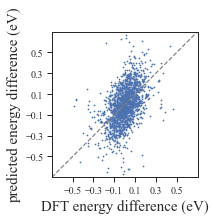

In [16]:
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 10, 'ytick.labelsize': 10, })

lim_range = [-0.7, 0.7]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_train, legend_out=True,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'energy_difference', 'predicted_de', alpha=1, s=1, marker='8')
# g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
#                  scatterpoints=1, label_order=ele_list, prop={'size': 12})
# g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('predicted energy difference (eV)')
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xlabel(xlabel='DFT energy difference (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(-0.5, 0.7, 0.2), yticks=np.arange(-0.5, 0.7, 0.2))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
# g.fig.suptitle('One hot encoding with PCA method (Training)', size=20)

g.savefig('ediff_pred_train.png', dpi=1000, transparent=True)

print('rmse train', np.sqrt(mean_squared_error(df_train['energy_difference'], df_train['predicted_de'])))


rmse train 0.03235956190030986


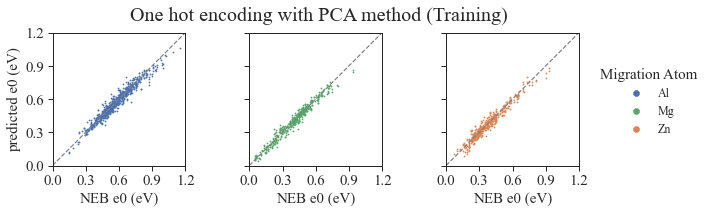

In [17]:
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [0, 1.2]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_train, col='migration_atom', hue='migration_atom', legend_out=True,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'e0', 'predicted_e0', alpha=1, s=1, marker='8')
g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
                 scatterpoints=1, label_order=ele_list, prop={'size': 12})
g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('predicted e0 (eV)')
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xlabel(xlabel='NEB e0 (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(0, 1.5, 0.3), yticks=np.arange(0, 1.5, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
g.fig.suptitle('One hot encoding with PCA method (Training)', size=20)

# g.savefig('barrier_pred_train.png', dpi=1000, transparent=True)

print('rmse train', np.sqrt(mean_squared_error(df_train['e0'], df_train['predicted_e0'])))

rmse train 0.08423217994057625
rmse test 0.0832403826525196


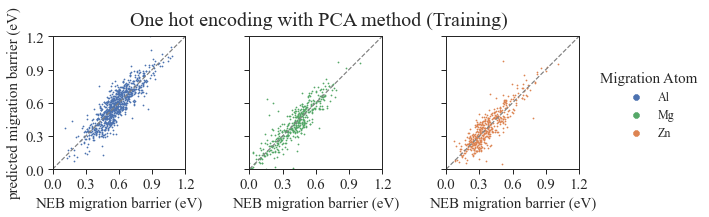

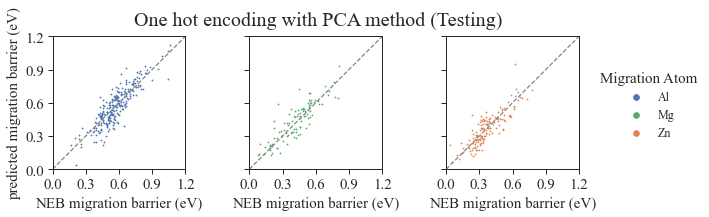

In [18]:
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [0, 1.2]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_train, col='migration_atom', hue='migration_atom', legend_out=True,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'migration_barriers', 'predicted_barrier', alpha=1, s=1, marker='8')
g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
                 scatterpoints=1, label_order=ele_list, prop={'size': 12})
g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('predicted migration barrier (eV)')
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xlabel(xlabel='NEB migration barrier (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(0, 1.5, 0.3), yticks=np.arange(0, 1.5, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
g.fig.suptitle('One hot encoding with PCA method (Training)', size=20)

g.savefig('barrier_pred_train.png', dpi=1000, transparent=True)

print('rmse train', np.sqrt(mean_squared_error(df_train['migration_barriers'], df_train['predicted_barrier'])))
##################################################################################################################
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [0, 1.2]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_test, col='migration_atom', hue='migration_atom', legend_out=True,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'migration_barriers', 'predicted_barrier', alpha=1, s=1, marker='8')
g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
                 scatterpoints=1, label_order=ele_list, prop={'size': 12})
g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('predicted migration barrier (eV)')
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xlabel(xlabel='NEB migration barrier (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(0, 1.5, 0.3), yticks=np.arange(0, 1.5, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
g.fig.suptitle('One hot encoding with PCA method (Testing)', size=20)

g.savefig('barrier_pred_test.png', dpi=1000, transparent=True)

print('rmse test', np.sqrt(mean_squared_error(df_test['migration_barriers'], df_test['predicted_barrier'])))